## Exploration 01. 인공지능과 가위바위보 하기

다운받은 이미지의 크기는 224x224 이기 때문에 
### 1) 데이터 불러오기 + Resize 하기

In [1]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


이미지 사이즈 변경 전에 클라우드에 디렉토리를 만들고 이미지를 업로드 해야한다.

또한, cd 와 unzip 같은 명령어를 사용해서 사진들을 압축해제 한다.

##### 가위 이미지를 불러와서 28 x 28 사이즈로 변경하기

In [2]:
import os
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1300  images to be resized.
1300  images resized.
가위 이미지 resize 완료!


##### 바위 이미지를 불러와서 28 x 28 사이즈로 변경하기

In [3]:
import os
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장한다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

200  images to be resized.
200  images resized.
바위 이미지 resize 완료!


##### 보 이미지를 불러와서 28 x 28 사이즈로 변경하기

In [4]:
import os
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장한다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

2200  images to be resized.
2200  images resized.
보 이미지 resize 완료!


가위,바위, 보를 읽을 수 있는 load_data() 함수를 통해서 임의의 사진데이터에 적용가능하다.

3개의 클래스만 있으면 되고, 가위:0 , 바위:1, 보:2 로 라벨링이 된다,

In [5]:
import numpy as np

def load_data(img_path, number_of_data=3700):  # 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3700 입니다.
x_train shape: (3700, 28, 28, 3)
y_train shape: (3700,)


##### 이미지 불러오기

train data 들이 잘 설정이 되었는지 불러와보기~

라벨:  0


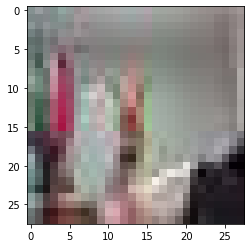

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[1])

##### ----------------------데이터 준비는 모두 끝남-----------------------------------------

### 2) 딥러닝 네트워크 설계하기

딥러닝 네트워크를 만들고 모델을 만든다.
직접 만든 딥러닝 네트워크 모델을 확인하려면, model.summary() 메소드를 이용하면 된다.

In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np



n_channel_1=27
n_channel_2=40
n_channel_3=30
n_dense=16
n_train_epoch=10


model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), input_shape=(28,28,3), kernel_initializer='he_normal',padding = 'same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu',kernel_initializer='he_normal'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax',kernel_initializer='he_normal'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()  

Model에 추가된 Layer 개수:  16
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 27)        756       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 27)        108       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 27)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 27)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 40)        9760      
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 40)        160       
_________________________________________________________________
activation_1 (Activation)    

### 3) 딥러닝 네트워크 학습시키기

In [25]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))


x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  ## 컬러이기 때문에 마지막에 3을 씀(R,G,B)
                                                       ## 데이터갯수에 -1을 쓰면 reshape시 자동계산 된다.

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))


Before Reshape - x_train_norm shape: (3700, 28, 28, 3)
After Reshape - x_train_reshaped shape: (3700, 28, 28, 3)


이제 내가 만든 x_train 학습 데이터로 딥러닝 네트워크를 학습시킨다. 
epochs= 10 은 전체 데이터를 10번 학습시킨다는 뜻이다. 

In [39]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
116/116 [==============================] - 1s 4ms/step - loss: 0.0433 - accuracy: 0.9803
Epoch 2/10
116/116 [==============================] - 0s 4ms/step - loss: 0.0277 - accuracy: 0.9878
Epoch 3/10
116/116 [==============================] - 0s 4ms/step - loss: 0.0294 - accuracy: 0.9865
Epoch 4/10
116/116 [==============================] - 0s 4ms/step - loss: 0.0259 - accuracy: 0.9895
Epoch 5/10
116/116 [==============================] - 0s 4ms/step - loss: 0.0415 - accuracy: 0.9843
Epoch 6/10
116/116 [==============================] - 0s 4ms/step - loss: 0.0282 - accuracy: 0.9870
Epoch 7/10
116/116 [==============================] - 0s 4ms/step - loss: 0.0391 - accuracy: 0.9862
Epoch 8/10
116/116 [==============================] - 0s 4ms/step - loss: 0.0247 - accuracy: 0.9886
Epoch 9/10
116/116 [==============================] - 0s 4ms/step - loss: 0.0234 - accuracy: 0.9889
Epoch 10/10
116/116 [==============================] - 0s 4ms/step - loss: 0.0245 - accuracy: 0.9876

### 4) 얼마나 잘 만들었는지 확인하기

##### 가위 이미지를 불러와서 28 x 28 사이즈로 변경하기

In [27]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장한다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

200  images to be resized.
200  images resized.
가위 이미지 resize 완료!


##### 바위 이미지를 불러와서 28 x 28 사이즈로 변경하기

In [28]:
import os
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장한다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

200  images to be resized.
200  images resized.
바위 이미지 resize 완료!


##### 보 이미지를 불러와서 28 x 28 사이즈로 변경하기

In [29]:
import os
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장한다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

200  images to be resized.
200  images resized.
보 이미지 resize 완료!


#### 아까 train 데이터처럼 test 데이터도 설정

In [30]:
import numpy as np

def load_data(img_path, number_of_data=600):  # 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 600 입니다.
x_test shape: (600, 28, 28, 3)
y_test shape: (600,)


데이터가 잘 설정되었는지 한 번 보기

라벨:  0


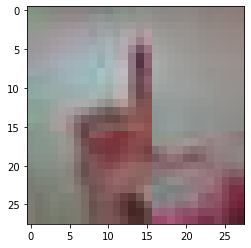

In [31]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])
print('라벨: ', y_test[5])

In [32]:

print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)


print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_test_norm shape: (600, 28, 28, 3)
After Reshape - x_test_reshaped shape: (600, 28, 28, 3)


### 테스트 데이터로 성능을 확인해보는 과정임

In [40]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

19/19 - 0s - loss: 8.6398 - accuracy: 0.3333
test_loss: 8.639827728271484 
test_accuracy: 0.3333333432674408


어떤 데이터를 잘못 추론했는지 결과를 가지고 보기!

In [34]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.00155024 0.9962244  0.00222535]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


결과를 보니까 묵은 잘 되었는데 가위랑 보는 잘 안된걸 확인할 수 있다.

### model 이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우는 어떤 경우인지 확인해보기

예측확률분포: [9.7975440e-05 9.9937952e-01 5.2254536e-04]
라벨: 0, 예측결과: 1


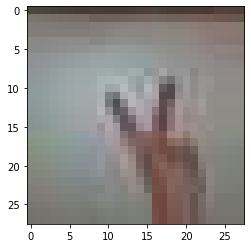

예측확률분포: [0.00109589 0.99355704 0.00534708]
라벨: 2, 예측결과: 1


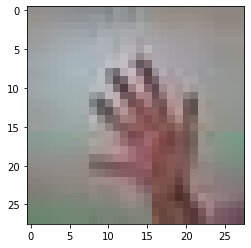

예측확률분포: [0.00187535 0.99372596 0.00439874]
라벨: 2, 예측결과: 1


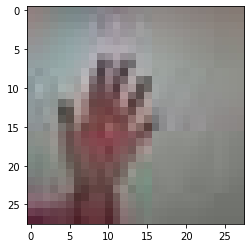

예측확률분포: [2.5025016e-04 9.9877745e-01 9.7229367e-04]
라벨: 2, 예측결과: 1


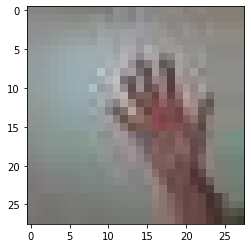

예측확률분포: [8.5100351e-04 9.9739730e-01 1.7517016e-03]
라벨: 2, 예측결과: 1


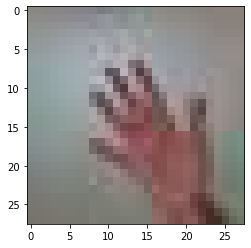

In [36]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# 회고!

## < 어려웠던 점>
=> 일단 데이터를 가지고 이런 프로젝트를 해보는 것이 처음이라서 막막했다. lms 노드를 붙잡고 일주일동안 끙끙 머리를 싸맸지만 이게 코드를 바꾸면 바꿔 갈수 록 점점 더 accuracy 만 떨어졌다. 감을 잡기까지 시간이 많이 걸렸고 아직도 완전히 받아들이지 못해.. 하루 한 번씩 노드에 들어가서 코드를 생각해보고 구글링을 한다...

## < 알아낸 점> & < 아직까지 모호한 점>
=> 이번에 전체적으로 다 새로워서 그런지 안 점들이 많다. 특히 네트워크를 설계하는 과정에서 찾아도 보고 여러사람들에게 물어보면서 drop out 이라는 것을 알게 되었고, 흑백과 컬러도 표현하는게 다른 것을 알게되었다. 또한, 딥러닝에 대해서 찾아보며 문제점은 크게 Underfitting이거나, 느리거나, 과하거나(overfitting) 로 나눠진다는 것을 알게되었다. 그리고 각 상황에서 어떤 함수랑 가중치들을 최적화 하는 법등을 알게 되었다. 아직까지 model 을 설정하는 과정에서 헷갈리는 점이 많이 있다. 사실 model 설정은 lms노드를 보고 작성한게 커서 아직까지 연구중이다..ㅎㅎㅎ

## <시도한 것들>
=> 일단 처음에는 데이터를 각 100개씩으로만 하다가 점차 100개씩 늘려보고 accuracy가 어떻게 변해가는지 봤다. 그리고 test데이터도 내 손과 비슷한 사람 손을 넣었더니 훨씬 올라갔다. 그리고 파일 100개 1000개의 이름도 한 번에 바꾸는 법에 대해서 알게되어서 계속 데이터들을 늘려서 해보았다. 또한, 사진크기를 달리하면 달라진다고 해서 또 달리 해보았지만 28과 56정도는 비슷한 결과가 나오는 것 같다. 그리고 dropout 수치도 0.1에서 0.5 점점 늘리면서 accuracy가 어떻게 변화하는지 봤다.

## <달성 하지 못한 이유>
=> 음,, 일단 55까지도 올려봤지만 이게 데이터가 많고 정확히 학습이 되지 않아 결과값이 오락가락 한 것 같다. 그리고 가장 큰 이유는 뒷 배경이 흰 배경이지 않은 사진이 많아서 loss값이 높게 나온 것 같다. 또한, Validation 이라는 것을 공부하던 중 알게되어서 시도를 해보려고 했지만 개념은 아는데 코드를 어떻게 짜는지 확실하지 않아서 일단 내는데 낸 후에 다시 시도를 해보려고 한다. 

## < 자기 다짐>
=> 사실 첫 프로젝트인만큼 성공적으로 별 3개를 받고싶었지만 스스로가 부족한 부분이 많았던 것 같다. 그리고 코드를 짜고 이것저것 시도를 해보지 않고 오류가 생길까봐 찔끔씩 봐꿔서 별 성공을 못한 것 같다. 일찍 구글링과 다양한 시도를 했으면 더 나았을텐데라는 생각을 했다. 하지만, 이거를 해보려고 구글링도 해보고 여러 사람들의 코드를 봤다. 나는 데이터를 바꿔보는게 좋을 것 같지만, 시간이 부족했던 관계로 일단 생략을 했다. 앞으로도 노드에 더 시간을 들이며 공부를 하고, 평가에 만점을 받을 수 있도록 최선을 다해야겠다!!! 화이팅!!